In [1]:
import pp_plots
import numpy as np
import matplotlib.pyplot as plt
import glob
import math

### This particular function is designed specifically for my file organization in this example

In [2]:
def get_chains(globpath, chainfile, ind):
    """
    Read in a bunch of chain files and injected values
    
    Parameters
    ----------
    globpath : string
        Path to run directories
        
    chainfile : string
        Name of chain file
        
    ind : int
        Which column has the parameter of interest (counting starts at 0)
        
    Returns
    -------
    megachain : array_like[Nrun,Nsample]
        an array of the chain for your parameter for each run
        
    tru : array_like[Nrun]
        A 1-d array of injected parameters (same order as megachain)
    
    """
    
    
    megachain = []
    tru = []

    for d in glob.glob(globpath):
        
        infile = np.genfromtxt(d+chainfile)
        megachain.append(infile[:,ind+2])

        infile = np.genfromtxt(d+'truth.dat')
        tru.append(infile[ind,1])
        
    return(megachain,tru)

#### My directory, and chain file name

In [3]:
globpath = '/Users/megmillhouse/Desktop/LIGO/popcorn/statistical_tests/NV2_pp/runs_from_CIT/run_*/'
chainfile = 'chain_stoke2.dat'

In [4]:
megachain_sn1, tru_sn1 = get_chains(globpath,chainfile,0)

In [5]:
Nbins = 100
Nruns = len(megachain_sn1)

#### Make our CDF:

In [6]:
bins, vals = pp_plots.pp_cdf(megachain_sn1,tru_sn1,Nbins)

### Make our plots !

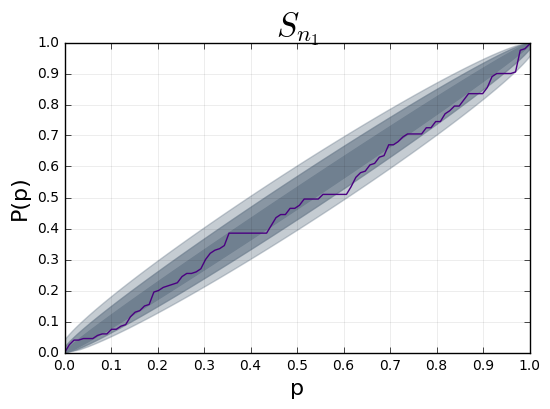

In [7]:
f = pp_plots.make_plots(bins,vals,Nruns,'$S_{n_1}$')
plt.show()

 Almost diagonal :)